# INSURANCE DATASET ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


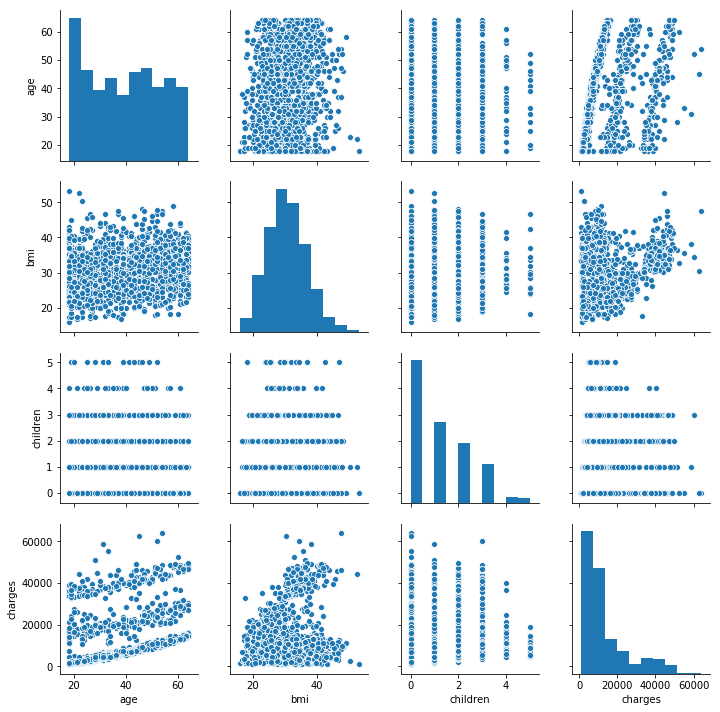

In [5]:
sns.pairplot(data)

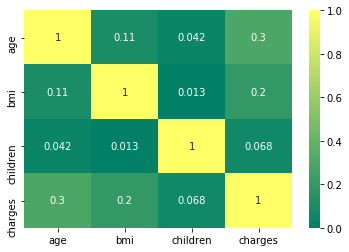

In [6]:
corr = data.corr()
sns.heatmap(corr, annot=True, vmax=1.0, vmin=0.0, cmap="summer")

<b>== DATA ANALYSIS QUERIES ==</b>

Gender Counts Ratio

In [7]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

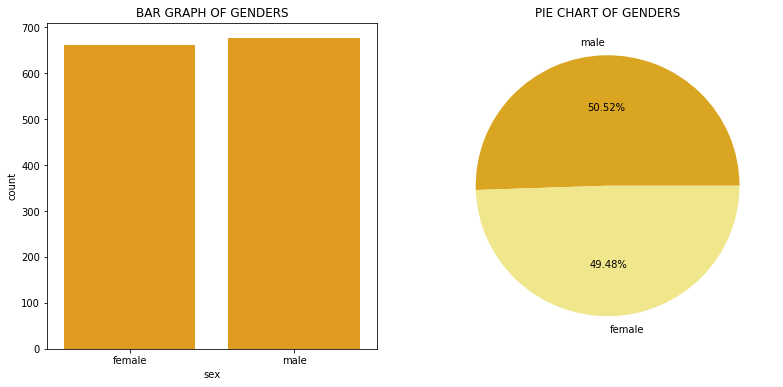

In [8]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS")
sns.countplot(data.sex, color="orange")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDERS")
plt.pie(data.sex.value_counts(), labels=data.sex.value_counts().index, autopct="%1.2f%%", colors=["goldenrod","khaki"])

plt.show()

Smokers And Non-Smokers Ratio

In [9]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

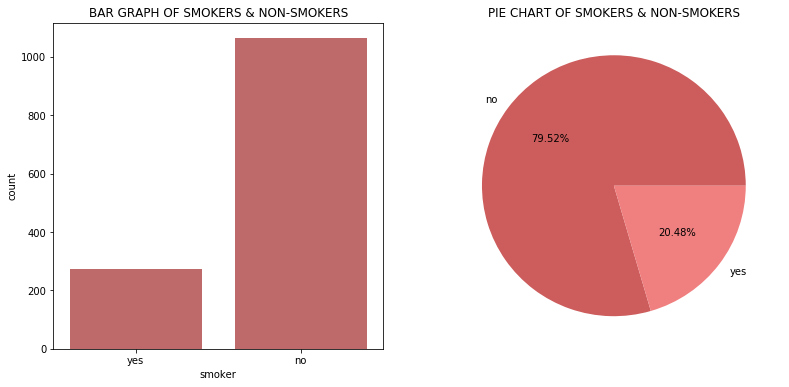

In [10]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS & NON-SMOKERS")
sns.countplot(data.smoker, color="indianred")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF SMOKERS & NON-SMOKERS")
plt.pie(data.smoker.value_counts(), labels=data.smoker.value_counts().index, autopct="%1.2f%%", colors=["indianred","lightcoral"])

plt.show()

BMI Averages With Respect To Genders

In [11]:
# MALE DATA

male_data = data[data["sex"]=="male"].reset_index(drop=True)
male_data.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,37,male,29.830,2,no,northeast,6406.41070


In [12]:
male_bmi_avg = male_data["bmi"].mean()
print("Average Of BMI (Males): ",round(male_bmi_avg,2))

Average Of BMI (Males):  30.94


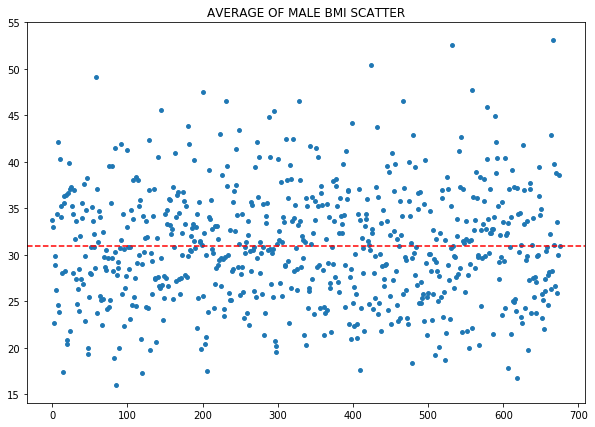

In [13]:
plt.figure(figsize=(10,7))
plt.title("AVERAGE OF MALE BMI SCATTER")
plt.scatter(male_data.index,male_data.bmi, s=15)
plt.axhline(male_bmi_avg, color='r', linestyle='dashed')

In [14]:
# FEMALE DATA

female_data = data[data["sex"]=="female"].reset_index(drop=True)
female_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,31,female,25.74,0,no,southeast,3756.62160
2,46,female,33.44,1,no,southeast,8240.58960
3,37,female,27.74,3,no,northwest,7281.50560
4,60,female,25.84,0,no,northwest,28923.13692


In [15]:
female_bmi_avg = female_data["bmi"].mean()
print("Average Of BMI (Females): ",round(female_bmi_avg,2))

Average Of BMI (Females):  30.38


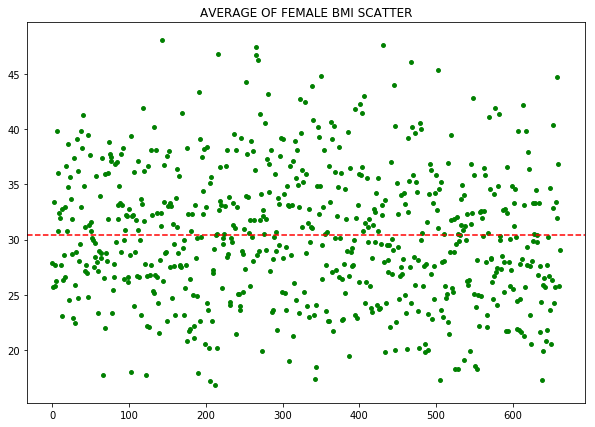

In [16]:
plt.figure(figsize=(10,7))
plt.title("AVERAGE OF FEMALE BMI SCATTER")
plt.scatter(female_data.index,female_data.bmi, s=15, c="green")
plt.axhline(female_bmi_avg, color='r', linestyle='dashed')

Male And Female Smokers Ratio

In [17]:
yes_smokers = data[data["smoker"]=="yes"].reset_index(drop=True)
yes_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,62,female,26.29,0,yes,southeast,27808.7251
2,27,male,42.13,0,yes,southeast,39611.7577
3,30,male,35.30,0,yes,southwest,36837.4670
4,34,female,31.92,1,yes,northeast,37701.8768


In [18]:
yes_smokers.sex.value_counts()

male      159
female    115
Name: sex, dtype: int64

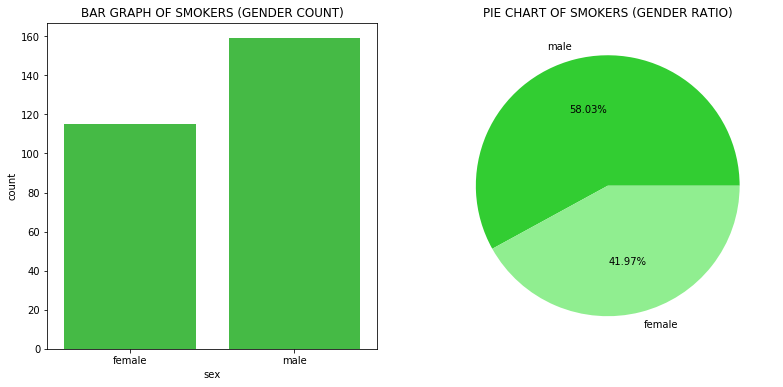

In [19]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS (GENDER COUNT)")
sns.countplot(yes_smokers.sex, color="limegreen")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF SMOKERS (GENDER RATIO)")
plt.pie(yes_smokers.sex.value_counts(), labels=yes_smokers.sex.value_counts().index, autopct="%1.2f%%", colors=["limegreen","lightgreen"])

plt.show()

Counts Of Males Having Charges Greater Than Mean Charges

In [20]:
avg_charges = data["charges"].mean()
print("Average Of Charges: ",avg_charges)

Average Of Charges:  13270.422265141257


In [21]:
m_above_avg_char = male_data["charges"][male_data["charges"] > avg_charges]

In [22]:
print("There are ",len(m_above_avg_char)," Males having Charges greater than Average Charges")

There are  221  Males having Charges greater than Average Charges


In [23]:
m_above_avg_char = m_above_avg_char.reset_index(drop=True)

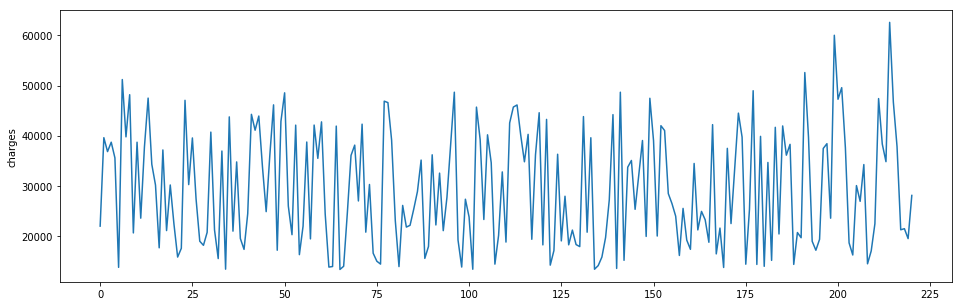

In [24]:
plt.figure(figsize=(16,5))
plt.xticks(np.arange(0,226,25))
sns.lineplot(m_above_avg_char.index, m_above_avg_char)

Region Ratio Of Genders

In [28]:
print("==MALES AND THEIR REGIONS==")
male_data.region.value_counts()

==MALES AND THEIR REGIONS==


southeast    189
northeast    163
southwest    163
northwest    161
Name: region, dtype: int64

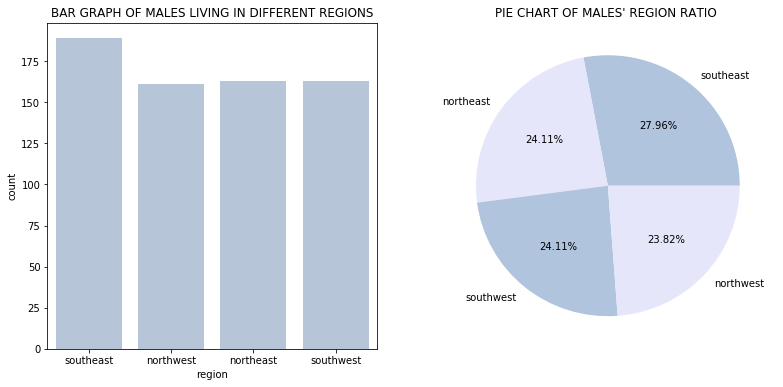

In [33]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF MALES LIVING IN DIFFERENT REGIONS")
sns.countplot(male_data.region, color="lightsteelblue")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF MALES' REGION RATIO ")
plt.pie(male_data.region.value_counts(), labels=male_data.region.value_counts().index, autopct="%1.2f%%", colors=["lightsteelblue","lavender"])

plt.show()

In [27]:
print("==FEMALES AND THEIR REGIONS==")
female_data.region.value_counts()

==FEMALES AND THEIR REGIONS==


southeast    175
northwest    164
southwest    162
northeast    161
Name: region, dtype: int64

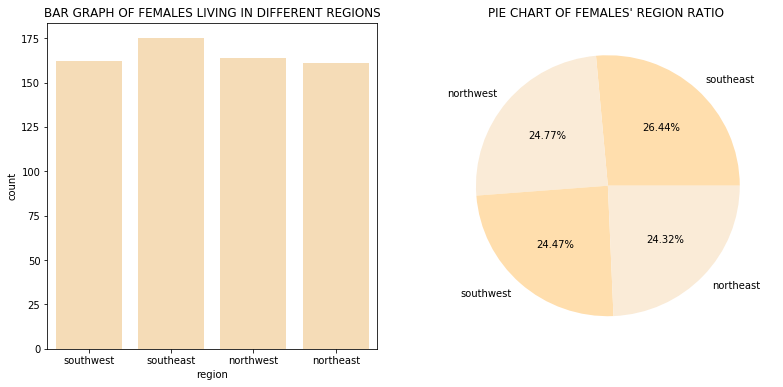

In [36]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF FEMALES LIVING IN DIFFERENT REGIONS")
sns.countplot(female_data.region, color="navajowhite")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF FEMALES' REGION RATIO ")
plt.pie(female_data.region.value_counts(), labels=female_data.region.value_counts().index, autopct="%1.2f%%", colors=["navajowhite","antiquewhite"])

plt.show()

Genders Ratio Of Ages Greater Than 30

In [43]:
ages_above_40 = data[data["age"]>40].reset_index(drop=True)
ages_above_40.head()

,age,sex,bmi,children,smoker,region,charges
0,46,female,33.44,1,no,southeast,8240.58960
1,60,female,25.84,0,no,northwest,28923.13692
2,62,female,26.29,0,yes,southeast,27808.72510
3,56,female,39.82,0,no,southeast,11090.71780
4,52,female,30.78,1,no,northeast,10797.33620


In [44]:
print("==GENDER COUNTS HAVING AGE MORE THAN FORTY==")
ages_above_40.sex.value_counts()

==GENDER COUNTS HAVING AGE MORE THAN FORTY==


female    321
male      316
Name: sex, dtype: int64

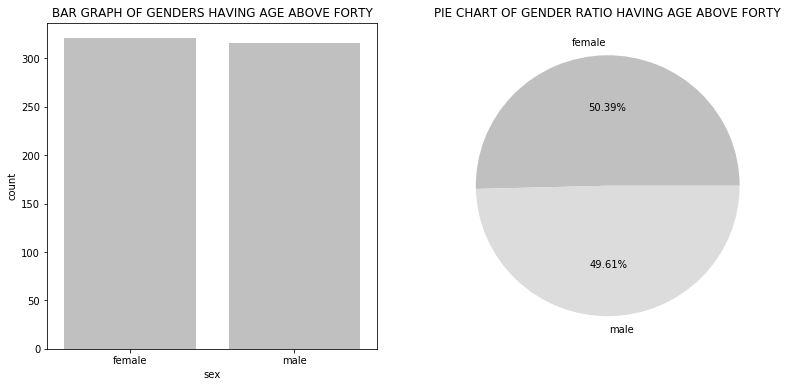

In [45]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS HAVING AGE ABOVE FORTY")
sns.countplot(ages_above_40.sex, color="silver")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDER RATIO HAVING AGE ABOVE FORTY")
plt.pie(ages_above_40.sex.value_counts(), labels=ages_above_40.sex.value_counts().index, autopct="%1.2f%%", colors=["silver","gainsboro"])

plt.show()

Ratio Of Regions Having Smokers

In [49]:
print("==SMOKERS COUNTS PER REGION==")
yes_smokers.region.value_counts()

==SMOKERS COUNTS PER REGION==


southeast    91
northeast    67
northwest    58
southwest    58
Name: region, dtype: int64

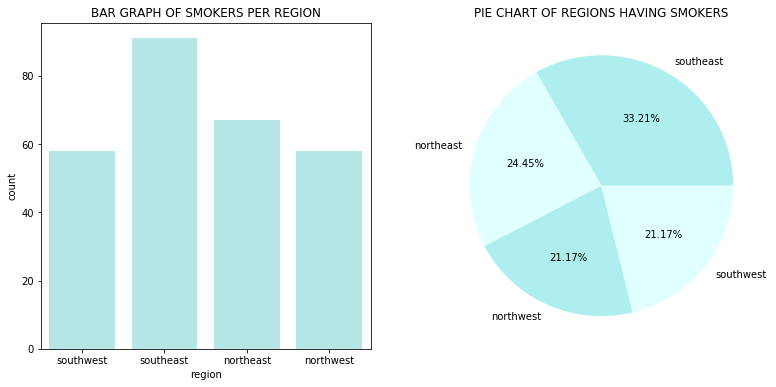

In [52]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF SMOKERS PER REGION")
sns.countplot(yes_smokers.region, color="paleturquoise")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF REGIONS HAVING SMOKERS")
plt.pie(yes_smokers.region.value_counts(), labels=yes_smokers.region.value_counts().index, autopct="%1.2f%%", colors=["paleturquoise","lightcyan"])

plt.show()

Genders Ratio Having Three Children

In [54]:
three_child = data[data["children"]==3].reset_index(drop=True)
three_child.head()

,age,sex,bmi,children,smoker,region,charges
0,28,male,33.000,3,no,southeast,4449.46200
1,37,female,27.740,3,no,northwest,7281.50560
2,59,female,27.720,3,no,southeast,14001.13380
3,62,female,32.965,3,no,northwest,15612.19335
4,40,female,28.690,3,no,northwest,8059.67910


In [55]:
print("==GENDER COUNTS HAVING THREE CHILDREN==")
three_child.sex.value_counts()

==GENDER COUNTS HAVING THREE CHILDREN==


male      80
female    77
Name: sex, dtype: int64

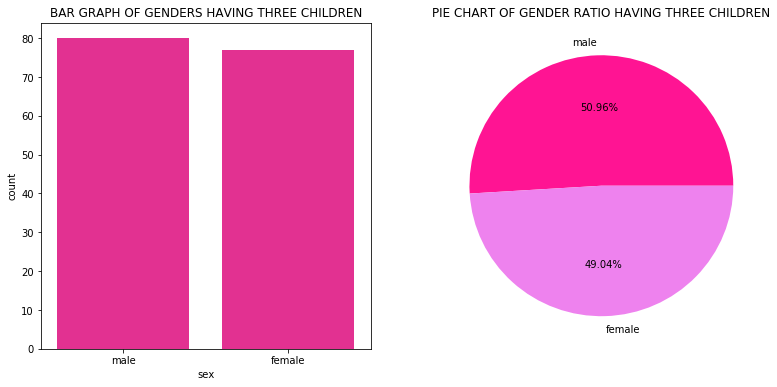

In [58]:
fig = plt.figure(figsize=(13,6))

fig.add_subplot(1,2,1)
plt.title("BAR GRAPH OF GENDERS HAVING THREE CHILDREN")
sns.countplot(three_child.sex, color="deeppink")

fig.add_subplot(1,2,2)
plt.title("PIE CHART OF GENDER RATIO HAVING THREE CHILDREN")
plt.pie(three_child.sex.value_counts(), labels=three_child.sex.value_counts().index, autopct="%1.2f%%", colors=["deeppink","violet"])

plt.show()

Mean Of Ages With Respect To Genders

In [59]:
# MALE

male_age_mean = male_data["age"].mean()
print("Mean Of Ages (Males): ",round(male_age_mean,2))

Mean Of Ages (Males):  38.92


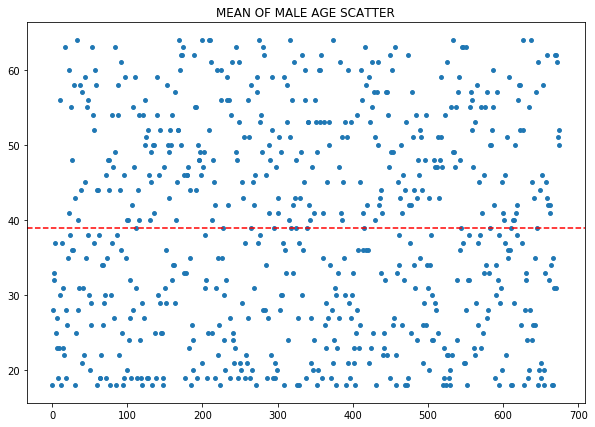

In [61]:
plt.figure(figsize=(10,7))
plt.title("MEAN OF MALE AGE SCATTER")
plt.scatter(male_data.index,male_data.age, s=15)
plt.axhline(male_age_mean, color='r', linestyle='dashed')

In [60]:
# FEMALE

female_age_mean = female_data["age"].mean()
print("Mean Of Ages (Males): ",round(female_age_mean,2))

Mean Of Ages (Males):  39.5


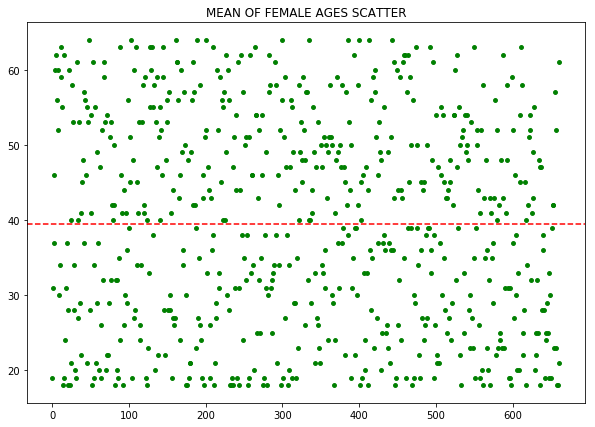

In [62]:
plt.figure(figsize=(10,7))
plt.title("MEAN OF FEMALE AGES SCATTER")
plt.scatter(female_data.index,female_data.age, s=15, c="green")
plt.axhline(female_age_mean, color='r', linestyle='dashed')